# Mrinmoy Sarkar
# Date: 10/25/2018

In [56]:
from sklearn import tree  
from sklearn.externals import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pydotplus
import collections
import itertools
%matplotlib inline

In [57]:
wifi_data = pd.read_csv("../data/wifi_data.csv")

In [58]:
wifi_data = wifi_data.reset_index(drop=True)
# print(wifi_data.head())

In [59]:
col_names = ["x"+str(i) for i in range(127)]
data_x = wifi_data[col_names]
print(data_x.head())
data_y = wifi_data[["y0","y1"]]
print(data_y.head())

    x0   x1   x2   x3   x4   x5   x6   x7   x8   x9  ...   x117  x118  x119  \
0 -100 -100 -100 -100  -82  -82 -100 -100 -100 -100  ...   -100   -71   -71   
1 -100 -100 -100 -100 -100 -100 -100 -100 -100 -100  ...   -100  -100  -100   
2 -100 -100 -100 -100  -90 -100 -100 -100 -100 -100  ...   -100   -70   -69   
3 -100 -100 -100 -100  -88  -87 -100 -100 -100 -100  ...   -100   -70   -75   
4 -100 -100 -100 -100  -80  -82 -100 -100 -100 -100  ...   -100   -71   -71   

   x120  x121  x122  x123  x124  x125  x126  
0   -60  -100   -78  -100  -100   -86   -86  
1  -100  -100  -100  -100  -100  -100  -100  
2   -66  -100  -100  -100  -100   -86   -86  
3   -69  -100   -81  -100  -100   -86   -86  
4   -65   -63   -83  -100  -100  -100  -100  

[5 rows x 127 columns]
    y0   y1
0  0.6  0.6
1  1.2  0.6
2  1.8  0.6
3  0.6  1.2
4  1.8  1.2


In [60]:
# def nnlayer(X,input_size,output_size):
#     w = tf.Variable(tf.truncated_normal([input_size,output_size], stddev=0.1))
#     b = tf.Variable(tf.constant(0.1, shape=[output_size]))
#     y = tf.matmul(X,w) + b
#     return y#tf.nn.relu(y)

In [61]:
# x = tf.placeholder(tf.float32,shape=[None,127])
# y_true = tf.placeholder(tf.float32,shape=[None,2])

In [62]:
# layer1 = nnlayer(x,127,256)
# layer2 = nnlayer(layer1,256,256)
# layer3 = nnlayer(layer2,256,128)
# layer4 = nnlayer(layer3,128,128)
# layer5 = nnlayer(layer4,128,64)
# layer6 = nnlayer(layer5,64,64)
# layer7 = nnlayer(layer6,64,32)
# layer8 = nnlayer(layer7,32,32)
# layer9 = nnlayer(layer8,32,32)
# layer10 = nnlayer(layer9,32,16)
# layer11 = nnlayer(layer10,16,16)
# y = nnlayer(layer11,16,2)

In [63]:
# larning_rate = 0.001
# loss = tf.reduce_mean(tf.square(y_true-y))
# optimizer = tf.train.AdamOptimizer(learning_rate=larning_rate)
# train = optimizer.minimize(loss)
# init = tf.global_variables_initializer()

In [64]:
# epochs = 20000
# with tf.Session() as sess:
#     sess.run(init)
#     for e in range(epochs):
#         sess.run(train,feed_dict={x:data_x,y_true:data_y})
        
#         if e%100==0:
#             training_loss = sess.run(loss,feed_dict={x:data_x,y_true:data_y})
#             print("training loss : ",training_loss," epoch no. : ",e)
#     y_predicted = sess.run(y,feed_dict={x:data_x.head()})
#     print(y_predicted)
#     print(data_y.head())
#     prediction_loss = sess.run(loss,feed_dict={x:data_x.head(10),y_true:data_y.head(10)})
#     print("Prediction loss : ",prediction_loss)

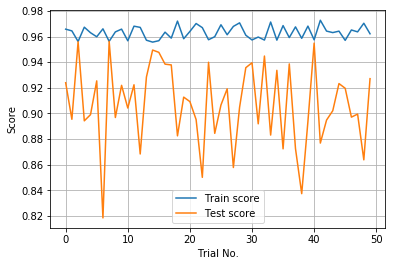

In [109]:
mse_error=[]
train_score=[]
test_score=[]
rmse_error=[]

for i in range(50):
    raw_error=[]
    X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)


    dtModel = DecisionTreeRegressor(criterion='mse', 
                                    splitter='best', 
                                    max_depth=None, 
                                    min_samples_split=2, 
                                    min_samples_leaf=1, 
                                    min_weight_fraction_leaf=0.0, 
                                    max_features=None, 
                                    random_state=None, 
                                    max_leaf_nodes=None, 
                                    min_impurity_decrease=0.0, 
                                    min_impurity_split=None, 
                                    presort=False)
    dtModel = dtModel.fit(X_train,y_train)
    y_pred = dtModel.predict(X_test)
    y_true = y_test.values
    mse_e = mean_squared_error(y_true, y_pred)
    mse_error.append(mse_e)
    train_score.append(dtModel.score(X_train,y_train))
    test_score.append(dtModel.score(X_test,y_test))
    
    e=0
    jj = 0
    for ii in range(y_true.shape[0]):
        dx = y_true[ii,0]-y_pred[ii,0]
        dy = y_true[ii,1]-y_pred[ii,1]
        er = np.sqrt(dx**2+dy**2)
        raw_error.append(er)
        if True:#er < 3:
            e += er
            jj += 1
    rmse = e/jj#y_true.shape[0]
    rmse_error.append(rmse)

plt.plot(train_score,label='Train score')
plt.plot(test_score,label='Test score')
plt.legend()
plt.xlabel('Trial No.')
plt.ylabel('Score')
plt.grid()
# plt.plot(rmse_error)
# plt.plot(raw_error)
# print(len(rmse_error))
# print(y_true.shape[0])

In [83]:
print(dtModel.score(X_train,y_train))
print(dtModel.score(X_test,y_test))

0.9647918260839775
0.8925161346385593


[21.28871586  6.75974882]
[[10.2  6. ]
 [19.8  6. ]
 [36.   9. ]
 [22.8  6.6]
 [35.4 14.4]]
[[10.2  5.4]
 [16.8  5.4]
 [36.   8.4]
 [22.8  6. ]
 [35.4 13.8]]


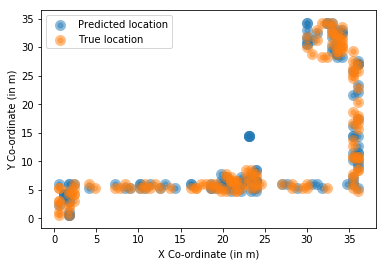

In [84]:
y_pred = dtModel.predict(X_test)
y_true = y_test.values
print(mean_squared_error(y_true, y_pred,multioutput='raw_values')) 
plt.scatter(y_pred[:,0],y_pred[:,1],alpha=0.5,linewidths=5.0,label='Predicted location')
plt.scatter(y_true[:,0],y_true[:,1],alpha=0.5,linewidths=5.0,label='True location')
plt.xlabel('X Co-ordinate (in m)')
plt.ylabel('Y Co-ordinate (in m)')
plt.legend()
print(y_pred[0:5,:])
print(y_true[0:5,:])

In [100]:
e=0
for i in range(y_true.shape[0]):
    dx = y_true[i,0]-y_pred[i,0]
    dy = y_true[i,1]-y_pred[i,1]
    e += np.sqrt(dx**2+dy**2)
rmse = e/y_true.shape[0]
print(rmse)

2.709759975324848


In [45]:
# Visualize data
data_feature_names = col_names
data_class_name = ['x','y']
dot_data = tree.export_graphviz(dtModel,
                                feature_names=data_feature_names,
                                class_names=data_class_name,
                                out_file=None,
                                max_depth=None,
                                leaves_parallel=False,
                                filled=True,
                                rounded=True,
                                special_characters=True) 
                         
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

True